In [4]:
#loading from the toolkit dir
import sys
sys.path.insert(0, r'C:\Users\Gpardo\Desktop\Consumption\Python Projects\Toolkit')

import excelload

In [8]:
import numpy as np

# How a network Works?

In [17]:
def predict_with_network(input_data,weights):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])

    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])
    
    # Calculate output here: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

In [101]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

In [102]:
input_data = np.array([0, 3])
input_data

array([0, 3])

In [103]:
weights_0 = {'node_0_0': [2, 1],
             'node_0_1': [1, 2],
             'node_1_0': [2, 1],
             'node_1_1': [1, 2],
             'output': [1, 1]
            }

In [104]:
weights_1 = {'node_0_0': [2, 1],
             'node_0_1': [0, 2],
             'node_1_0': [2, 1],
             'node_1_1': [1, 0],
             'output': [1, 1]
            }

In [105]:
target_actual = 3

# Predicting with Network

In [106]:
model_output_0 = predict_with_network(input_data, weights_0)
model_output_0

27

In [35]:
model_output_1 = predict_with_network(input_data, weights_1)
model_output_1

15

# The Mean Error

In [48]:
from sklearn.metrics import mean_squared_error

input_data=[np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
print(input_data)
target_actuals = [1,3,5,7]
print(target_actuals)

# Create model_output_0 
model_output_0 = []
# Create model_output_0
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

[array([0, 3]), array([1, 2]), array([-1, -2]), array([4, 0])]
[1, 3, 5, 7]
Mean squared error with weights_0: 529.500000
Mean squared error with weights_1: 169.750000


# Calculating the slope

In [58]:
input_data = np.array([1,2,3])
weights = np.array([0,2,1])
target = 0

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = target - preds

# Calculate the slope: slope
slope = input_data * error * 2

# Print the slope
print(slope)


[-14 -28 -42]


# How does the learning rate works?

In [59]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights-(learning_rate*slope)

# Get updated predictions: preds_updated
preds_updated = (weights_updated*input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


In [73]:
def predict_with_network1(input_data,weights):
    model_output = (input_data * weights).sum()
    # Return model_output
    return(model_output)

In [109]:
def get_slope(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    slope = 2 * input_data * error
    return slope
def get_mse(input_data,target,weights):
    pred = np.array([(weights * input_data).sum()])
    target = np.array([target])
    mse = mean_squared_error(target, pred)
    return mse

weights = np.array([-0.49929916,  1.00140168, -0.49789747])
target = 0
input_data = np.array([1, 2, 3])

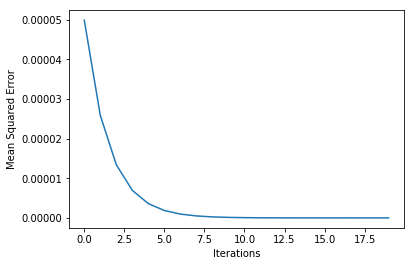

In [110]:
import matplotlib.pyplot as plt
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    # Update the weights: weights
    weights = weights - .01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()